In [31]:
from API_keys import API_weather
from citipy import citipy
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.stats as st
from scipy.stats import linregress

In [3]:
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)

city = []
for c in coordinates:
    name = citipy.nearest_city(c[0], c[1]).city_name
    if name not in city:
        city.append(name)
len(city)

637

In [4]:
weather = []
base_url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={API_weather}&q="

for i,c in enumerate(city):
    url = base_url + c
    try:
        city_info = requests.get(url).json()
        temp = {}
        temp["city"] = c
        temp["lat"] = city_info["coord"]["lat"]
        temp["lon"] = city_info["coord"]["lon"]
        temp["temp"] = city_info["main"]["temp_max"]
        temp["humidity"] = city_info["main"]["humidity"]
        temp["cloudiness"] = city_info["clouds"]["all"]
        temp["wind"] = city_info["wind"]["speed"]
        weather.append(temp)
        print(f"{i} - successfully added {c}")
    except: 
        print(f"{i} - could not add {c}")

0 - successfully added rikitea
1 - successfully added gamba
2 - could not add amderma
3 - successfully added atuona
4 - successfully added resistencia
5 - successfully added butaritari
6 - successfully added lesnyye polyany
7 - could not add braslav
8 - successfully added nanortalik
9 - successfully added dikson
10 - successfully added ribeira grande
11 - successfully added barrow
12 - successfully added yar-sale
13 - successfully added dungarpur
14 - could not add taolanaro
15 - successfully added puerto carreno
16 - successfully added clyde river
17 - successfully added cuiluan
18 - successfully added castro
19 - successfully added gamboula
20 - could not add westpunt
21 - successfully added ushuaia
22 - could not add illoqqortoormiut
23 - successfully added hualmay
24 - successfully added mataura
25 - successfully added san francisco
26 - successfully added aztec
27 - successfully added aconibe
28 - successfully added avarua
29 - successfully added mangrul pir
30 - successfully adde

243 - could not add sorvag
244 - successfully added sioux lookout
245 - successfully added east london
246 - successfully added ankazoabo
247 - successfully added saquena
248 - successfully added santa lucia
249 - successfully added wukari
250 - successfully added egvekinot
251 - successfully added hot springs
252 - successfully added ancud
253 - successfully added khani
254 - successfully added meulaboh
255 - successfully added dandong
256 - successfully added tadine
257 - successfully added jian
258 - successfully added tsumeb
259 - successfully added santa maria da vitoria
260 - successfully added skjervoy
261 - successfully added klaksvik
262 - successfully added tchollire
263 - successfully added lusaka
264 - successfully added leh
265 - successfully added grand-santi
266 - successfully added manzhouli
267 - could not add dzhusaly
268 - successfully added cuamba
269 - successfully added salalah
270 - successfully added puerto madryn
271 - successfully added martaban
272 - successf

484 - successfully added wrexham
485 - successfully added bilma
486 - successfully added abnub
487 - could not add tabiauea
488 - successfully added lavrentiya
489 - successfully added faya
490 - successfully added sudbury
491 - successfully added port hedland
492 - successfully added karasjok
493 - successfully added gobabis
494 - successfully added tateyama
495 - successfully added digha
496 - successfully added williston
497 - successfully added sheltozero
498 - successfully added kasane
499 - successfully added cockburn town
500 - successfully added saint andrews
501 - successfully added kuala terengganu
502 - successfully added palana
503 - successfully added bredy
504 - could not add ruian
505 - successfully added hay river
506 - could not add uralskiy
507 - successfully added pemba
508 - successfully added srandakan
509 - could not add bolungarvik
510 - successfully added piedra gorda
511 - successfully added ahuimanu
512 - successfully added eirunepe
513 - successfully added po

In [7]:
len(weather)

587

In [8]:
weatherdf = pd.DataFrame(weather)
weatherdf

,city,lat,lon,temp,humidity,cloudiness,wind
0,rikitea,-23.1203,-134.9692,71.40,66,5,12.57
1,gamba,-2.6500,10.0000,75.56,84,100,6.82
2,atuona,-9.8000,-139.0333,78.17,75,69,19.24
3,resistencia,-27.4606,-58.9839,49.05,100,0,5.75
4,butaritari,3.0707,172.7902,83.52,73,96,13.89
...,...,...,...,...,...,...,...
582,andenes,69.3143,16.1194,55.38,67,20,6.91
583,yumen,40.2833,97.2000,78.76,15,100,15.17
584,port hardy,50.6996,-127.4199,55.58,94,90,0.00
585,solnechnyy,50.7214,136.6319,68.14,82,100,2.86


In [13]:
# Save to CSV file
weatherdf.to_csv("output_data/cities.csv", index=False, header=True)

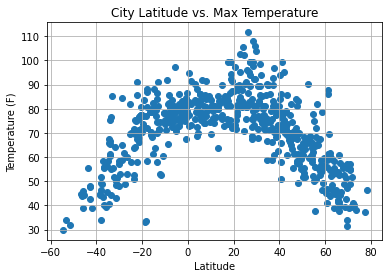

In [21]:
# Temperature (F) vs. Latitude
plt.scatter(weatherdf["lat"], weatherdf["temp"], marker="o")

# Graph Formatting
plt.title(f'City Latitude vs. Max Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Lat_vs_Max_Temp.png")

# Show plot
plt.show()

The City Latitude vs. Max Temperature graph (above) shows that the max temperature of cities geographically positioned between -10deg and 30deg latitude, are the highest of the sample data, with the majority falling between 70 and 90 degrees (F). With the exception of a few cities between 20deg and 30deg latitude whos max temperature reaches a peak of up to 110 degrees (F). For cities that are geographically positioned either below -10deg, or above 30deg latitude the max temperature falls beween 30 and 70 degrees (F). There is a possible linear relationship between city latitude and max temperature.

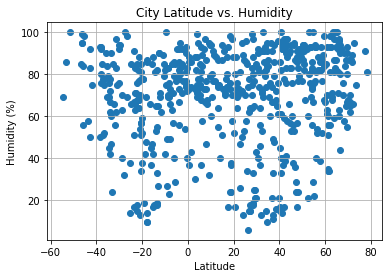

In [25]:
# Humidity (%) vs. Latitude
plt.scatter(weatherdf["lat"], weatherdf["humidity"], marker="o")

# Graph Formatting
plt.title(f'City Latitude vs. Humidity')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Lat_vs_Humidity.png")

# Show plot
plt.show()

The City Latitude vs. Humidity graph (above) shows a widely spread distribution across all latitude points. This suggests no linear relationship between latitude and humidity.

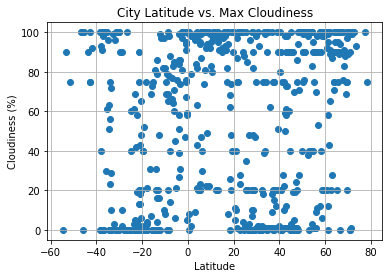

In [26]:
# Cloudiness (%) vs. Latitude
plt.scatter(weatherdf["lat"], weatherdf["cloudiness"], marker="o")

# Graph Formatting
plt.title(f'City Latitude vs. Max Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Lat_vs_Cloudiness.png")

# Show plot
plt.show()

The City Latitude vs. Max Cloudiness (%) graph (above) shows a wide spread distribution across all latitude positions. A large number of cities experienced a max cloudiness of 100% between -10deg and 80deg latitude. The spread suggests no linear relationhip between max cloudiness and latitude. 

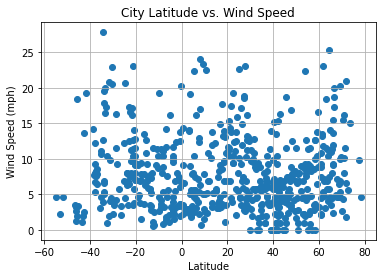

In [27]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weatherdf["lat"], weatherdf["wind"], marker="o")

# Graph Formatting
plt.title(f'City Latitude vs. Wind Speed')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Lat_vs_Wind_Speed.png")

# Show plot
plt.show()

The City Latitude vs. Wind Speed (mph) graph (above) shows an even spread across all latitude positions. Wind speed did not exceed 10 mph for most cities. The spread suggests no linear relationship between latitude and wind speed.

# Linear Regression

### Northern Hemisphere

In [57]:
north_df = weatherdf.loc[weatherdf['lat'] >= 0]
north_df

,city,lat,lon,temp,humidity,cloudiness,wind
4,butaritari,3.0707,172.7902,83.52,73,96,13.89
5,lesnyye polyany,55.9667,37.8667,68.32,81,70,8.99
6,nanortalik,60.1432,-45.2371,45.27,85,100,3.18
7,dikson,73.5069,80.5464,38.16,75,93,15.08
8,ribeira grande,38.5167,-28.7000,68.40,68,20,3.44
...,...,...,...,...,...,...,...
582,andenes,69.3143,16.1194,55.38,67,20,6.91
583,yumen,40.2833,97.2000,78.76,15,100,15.17
584,port hardy,50.6996,-127.4199,55.58,94,90,0.00
585,solnechnyy,50.7214,136.6319,68.14,82,100,2.86


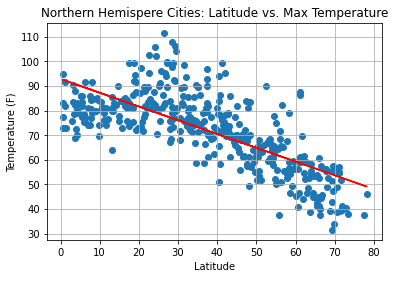

In [62]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Linear Regression
x_values = north_df['lat']
y_values = north_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Northern Hemispere Cities: Latitude vs. Max Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

The Northern Hemispere: Latitude vs. Max Temperature (F) graph is shown above. The linear regression shows there is a strong relationship between max temperature and latitude in the northern hemisphere.

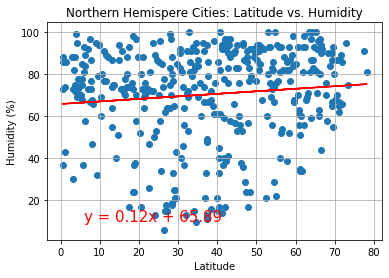

In [63]:
# Northern Hemisphere - Humidity (%) vs. Latitude
# Linear Regression
x_values = north_df['lat']
y_values = north_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Cities: Latitude vs. Humidity')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

The Northern Hemispere Cities: Latitude vs. Humidity (%) graph is shown above. The linear regression shows there is no relationship between Humidity and latitude in cities in the northern hemisphere.

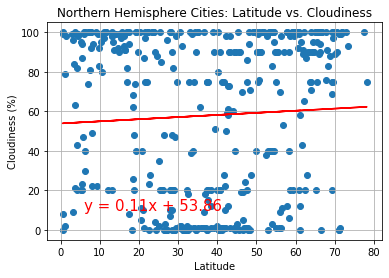

In [70]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Linear Regression
x_values = north_df['lat']
y_values = north_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Cities: Latitude vs. Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

The Northern Hemispere Cities: Latitude vs. Cloudiness (%) graph is shown above. The linear regression shows there is no relationship between cloudiness and latitude in cities in the northern hemisphere.

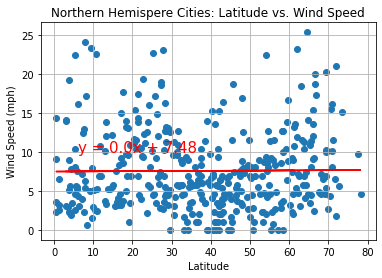

In [65]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Linear Regression
x_values = north_df['lat']
y_values = north_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Northern Hemispere Cities: Latitude vs. Wind Speed')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

The Northern Hemispere Cities: Latitude vs. Wind Speed (mph) graph is shown above. The linear regression shows there is no relationship between wind speed and latitude in cities in the northern hemisphere.

### Southern Hemisphere

In [39]:
south_df = weatherdf.loc[weatherdf['lat'] < 0]
south_df

,city,lat,lon,temp,humidity,cloudiness,wind
0,rikitea,-23.1203,-134.9692,71.40,66,5,12.57
1,gamba,-2.6500,10.0000,75.56,84,100,6.82
2,atuona,-9.8000,-139.0333,78.17,75,69,19.24
3,resistencia,-27.4606,-58.9839,49.05,100,0,5.75
15,castro,-24.7911,-50.0119,57.81,85,60,4.50
...,...,...,...,...,...,...,...
566,port augusta,-32.5000,137.7667,51.94,66,3,10.42
568,pocoes,-14.5297,-40.3653,63.63,81,81,5.91
569,coquimbo,-29.9533,-71.3436,47.93,76,0,2.30
571,codrington,-38.2667,141.9667,44.29,93,100,7.67


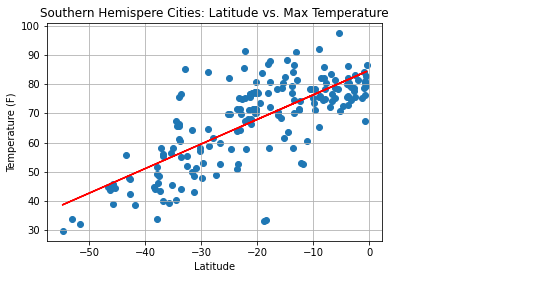

In [66]:
# Southern Hemisphere - Temperature (F) vs. Latitude
# Linear Regression
x_values = south_df['lat']
y_values = south_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Southern Hemispere Cities: Latitude vs. Max Temperature')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

The Southern Hemispere: Latitude vs. Max Temperature (F) graph is shown above. The linear regression shows there is a strong relationship between max temperature and latitude in the southern hemisphere.

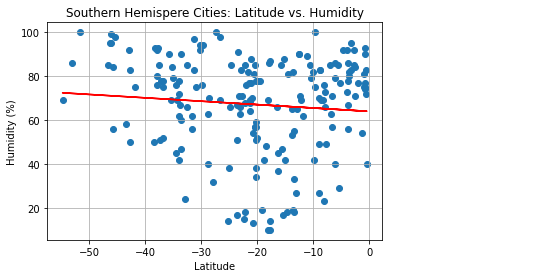

In [67]:
# Southern Hemisphere - Humidity (%) vs. Latitude
# Linear Regression
x_values = south_df['lat']
y_values = south_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Southern Hemispere Cities: Latitude vs. Humidity')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

The Southern Hemispere Cities: Latitude vs. Humidity (%) graph is shown above. The linear regression shows there is no relationship between Humidity and latitude in cities in the southern hemisphere.

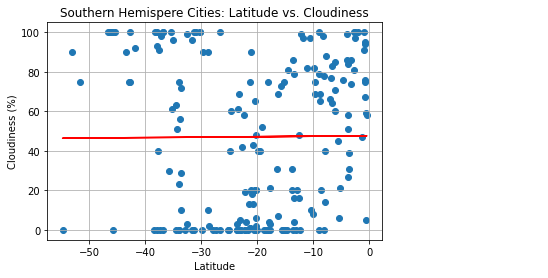

In [68]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Linear Regression
x_values = south_df['lat']
y_values = south_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Southern Hemispere Cities: Latitude vs. Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

The Southern Hemispere: Latitude plot vs. Cloudiness (%) graph is shown above. The linear regression shows there is no relationship between cloudiness and latitude in cities in the southern hemisphere.

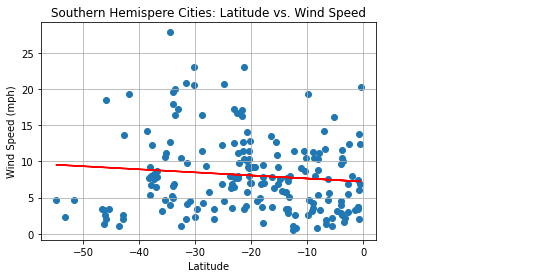

In [69]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
# Linear Regression
x_values = south_df['lat']
y_values = south_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'Southern Hemispere Cities: Latitude vs. Wind Speed')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

The Southern Hemispere: Latitude plot vs. Wind Speed (mph) graph is shown above. The linear regression shows there is no relationship between wind speed and latitude in cities in the southern hemisphere.